In [63]:
getwd()
setwd('C:\\Users\\Kashyar\\Documents\\datasetsforproj\\IBM attrition')
getwd()


[1] "C:/Users/Kashyar/Documents/datasetsforproj/IBM attrition"

[1] "C:/Users/Kashyar/Documents/datasetsforproj/IBM attrition"

In [64]:
hrdata<- read.csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
head(hrdata)
dim(hrdata)

ï..Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6


[1] 1470   35

In [65]:
library(dplyr)

library(corrplot)
library(caTools)


In [66]:
# Check for missing values

sapply(hrdata,function(inp){return(sum(is.na(inp)))})


ï..Age                Attrition           BusinessTravel 
                       0                        0                        0 
               DailyRate               Department         DistanceFromHome 
                       0                        0                        0 
               Education           EducationField            EmployeeCount 
                       0                        0                        0 
          EmployeeNumber  EnvironmentSatisfaction                   Gender 
                       0                        0                        0 
              HourlyRate           JobInvolvement                 JobLevel 
                       0                        0                        0 
                 JobRole          JobSatisfaction            MaritalStatus 
                       0                        0                        0 
           MonthlyIncome              MonthlyRate       NumCompaniesWorked 
                       0                        0                        0 
                  Over18                 OverTime        PercentSalaryHike 
                       0                        0                        0 
       PerformanceRating RelationshipSatisfaction            StandardHours 
                       0                        0                        0 
        StockOptionLevel        TotalWorkingYears    TrainingTimesLastYear 
                       0                        0                        0 
         WorkLifeBalance           YearsAtCompany       YearsInCurrentRole 
                       0                        0                        0 
 YearsSinceLastPromotion     YearsWithCurrManager 
                       0                        0

In [67]:
# Check for other abnormalities in the data:

head(hrdata,6)



ï..Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6


In [68]:
# Correcting the abnormalities:
#1) Column name age
names(hrdata)[1]="Age"
#2) Few columns have all the values same,so removing them
hrdata<- select(hrdata,-EmployeeCount,-StandardHours,-Over18)
head(hrdata,5)

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [69]:
# Converting Attrition into binary 0 & 1 for convenience:
hrdata$Attrition<-factor(hrdata$Attrition,labels = c('0','1'))
head(hrdata,5)

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [70]:
# Lets check the datatype of variables:
str(hrdata)

'data.frame':	1470 obs. of  32 variables:
 $ Age                     : int  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : Factor w/ 2 levels "0","1": 2 1 2 1 1 1 1 1 1 1 ...
 $ BusinessTravel          : Factor w/ 3 levels "Non-Travel","Travel_Frequently",..: 3 2 3 2 3 2 3 3 2 3 ...
 $ DailyRate               : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ Department              : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ DistanceFromHome        : int  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : int  2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : Factor w/ 6 levels "Human Resources",..: 2 2 5 2 4 2 4 2 2 4 ...
 $ EmployeeNumber          : int  1 2 4 5 7 8 10 11 12 13 ...
 $ EnvironmentSatisfaction : int  2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : Factor w/ 2 levels "Female","Male": 1 2 2 1 2 2 1 2 2 2 ...
 $ HourlyRate              : int  94 61 92 56 40 79 81 67 44 94 ...
 $ JobInvolvement          : in

In [71]:
# Correcting the data types:
hrdata$EnvironmentSatisfaction<-as.factor(hrdata$EnvironmentSatisfaction)
hrdata$JobInvolvement<-as.factor(hrdata$JobInvolvement)
hrdata$JobLevel<-as.factor(hrdata$JobLevel)
hrdata$JobSatisfaction<-as.factor(hrdata$JobSatisfaction)
hrdata$RelationshipSatisfaction<-as.factor(hrdata$RelationshipSatisfaction)
hrdata$StockOptionLevel<-as.factor(hrdata$StockOptionLevel)
hrdata$WorkLifeBalance<-as.factor(hrdata$WorkLifeBalance)
str(hrdata)

'data.frame':	1470 obs. of  32 variables:
 $ Age                     : int  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : Factor w/ 2 levels "0","1": 2 1 2 1 1 1 1 1 1 1 ...
 $ BusinessTravel          : Factor w/ 3 levels "Non-Travel","Travel_Frequently",..: 3 2 3 2 3 2 3 3 2 3 ...
 $ DailyRate               : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ Department              : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ DistanceFromHome        : int  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : int  2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : Factor w/ 6 levels "Human Resources",..: 2 2 5 2 4 2 4 2 2 4 ...
 $ EmployeeNumber          : int  1 2 4 5 7 8 10 11 12 13 ...
 $ EnvironmentSatisfaction : Factor w/ 4 levels "1","2","3","4": 2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : Factor w/ 2 levels "Female","Male": 1 2 2 1 2 2 1 2 2 2 ...
 $ HourlyRate              : int  94 61 92 56 40 79 81 67 44 94 ...


Age,-0.159205007
Attrition,1.000000000
DailyRate,-0.056651992
DistanceFromHome,0.077923583
Education,-0.031372820
EmployeeNumber,-0.010577243
HourlyRate,-0.006845550
MonthlyIncome,-0.159839582
MonthlyRate,0.015170213
NumCompaniesWorked,0.043493739
PercentSalaryHike,-0.013478202


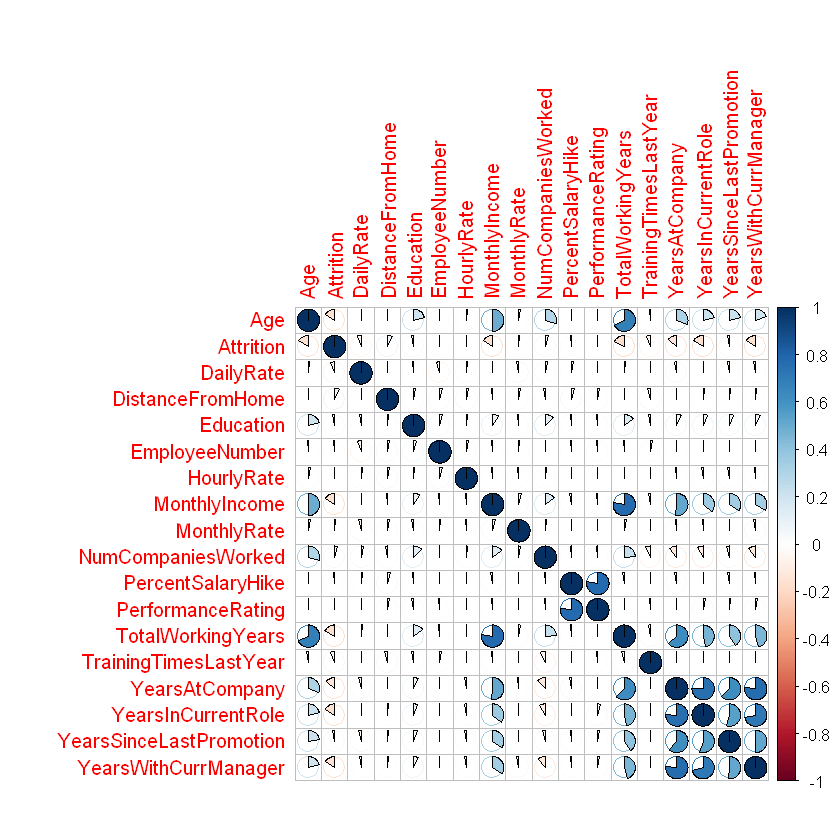

In [72]:
# Finding the correlations for numeric values:

ints<-c()
hrdata$Attrition<- as.integer(hrdata$Attrition)
for(i in 1:32)
 {if(is.integer(hrdata[,i]))
{
ints<-c(ints,i)}}
corrplot(cor(hrdata[,ints]),method = "pie",number.font = 1)
cor(hrdata[,ints],hrdata$Attrition)
hrdata$Attrition <- as.factor(hrdata$Attrition)
hrdata$Attrition<-factor(hrdata$Attrition,labels = c('0','1'))

In [73]:
# Thus Attrition is positively correlated to Age,Monthly Income,Total Working Years,YearsAtCompany 
# and YearsWithCurrentManager, and no significant negative correlation is found.

In [74]:
# Finding the categorical significant variables using chi-square test:

for(i in 1:length(hrdata))
  {if(class(hrdata[,i])!="integer")
   { tbl<-0
  tbl=table(hrdata$Attrition,hrdata[,i])
print(names(hrdata[i]))
print(chisq.test(tbl))}}

[1] "Attrition"

	Pearson's Chi-squared test with Yates' continuity correction

data:  tbl
X-squared = 1462.6, df = 1, p-value < 2.2e-16

[1] "BusinessTravel"

	Pearson's Chi-squared test

data:  tbl
X-squared = 24.182, df = 2, p-value = 5.609e-06

[1] "Department"

	Pearson's Chi-squared test

data:  tbl
X-squared = 10.796, df = 2, p-value = 0.004526

[1] "EducationField"


Warning message in chisq.test(tbl):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  tbl
X-squared = 16.025, df = 5, p-value = 0.006774

[1] "EnvironmentSatisfaction"

	Pearson's Chi-squared test

data:  tbl
X-squared = 22.504, df = 3, p-value = 5.123e-05

[1] "Gender"

	Pearson's Chi-squared test with Yates' continuity correction

data:  tbl
X-squared = 1.117, df = 1, p-value = 0.2906

[1] "JobInvolvement"

	Pearson's Chi-squared test

data:  tbl
X-squared = 28.492, df = 3, p-value = 2.863e-06

[1] "JobLevel"

	Pearson's Chi-squared test

data:  tbl
X-squared = 72.529, df = 4, p-value = 6.635e-15

[1] "JobRole"

	Pearson's Chi-squared test

data:  tbl
X-squared = 86.19, df = 8, p-value = 2.752e-15

[1] "JobSatisfaction"

	Pearson's Chi-squared test

data:  tbl
X-squared = 17.505, df = 3, p-value = 0.0005563

[1] "MaritalStatus"

	Pearson's Chi-squared test

data:  tbl
X-squared = 46.164, df = 2, p-value = 9.456e-11

[1] "OverTime"

	Pearson's Chi-squared test with Yates' continuity correction

data:  tbl
X-squared = 87.564, df = 1,

In [75]:
# Thus except Gender & Relationship Satisfaction, all other attributes appear to be significant:
# Removing them to avoid garbage
hrdata <- select(hrdata,-Gender,-RelationshipSatisfaction)
length(hrdata)

[1] 30

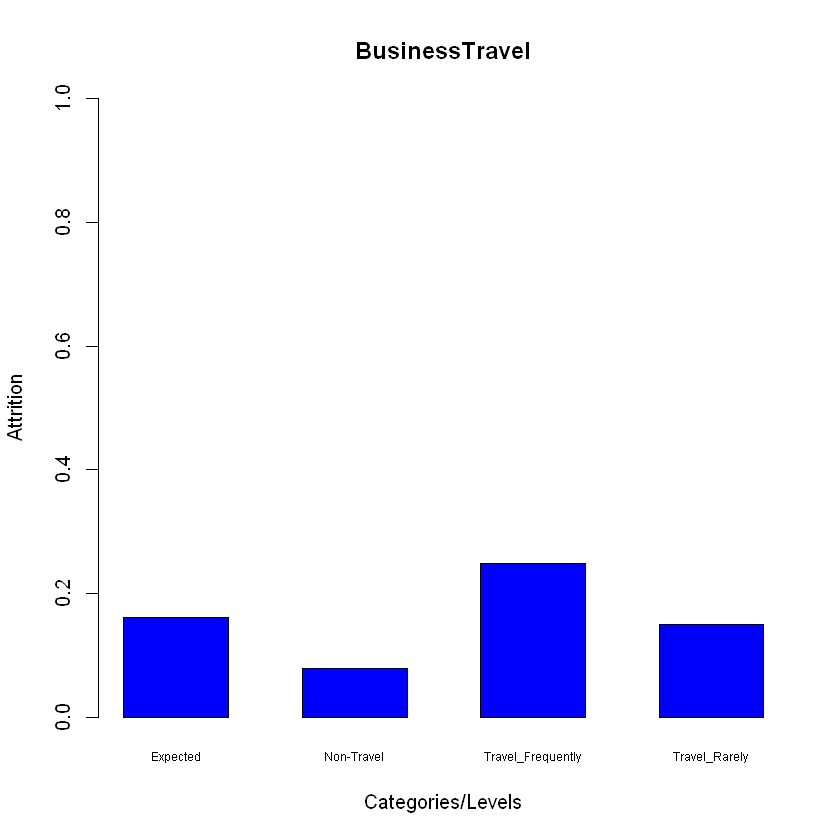

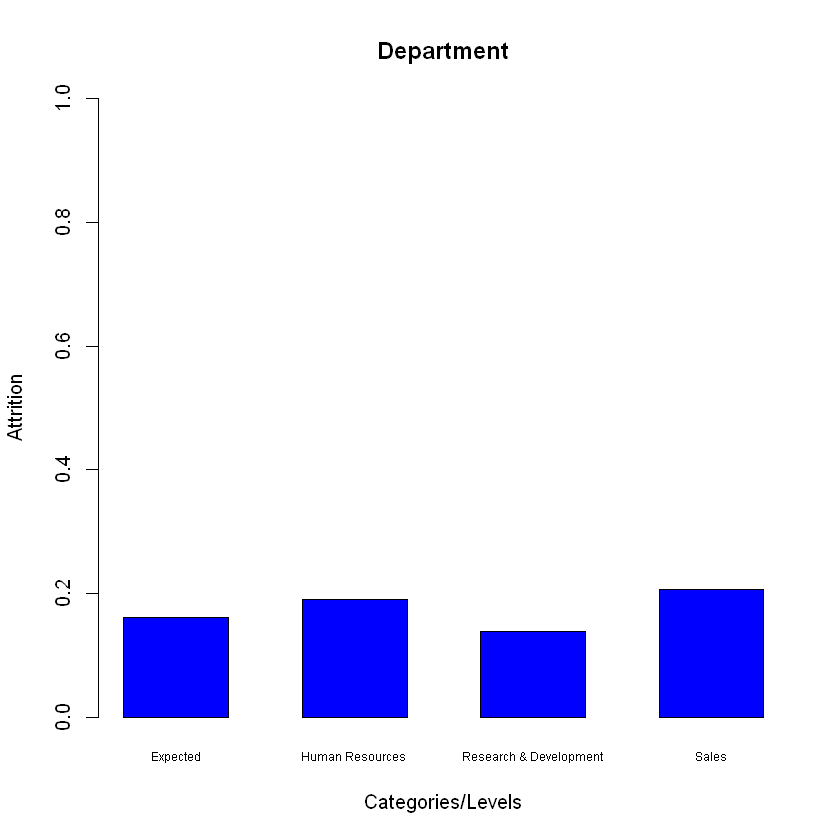

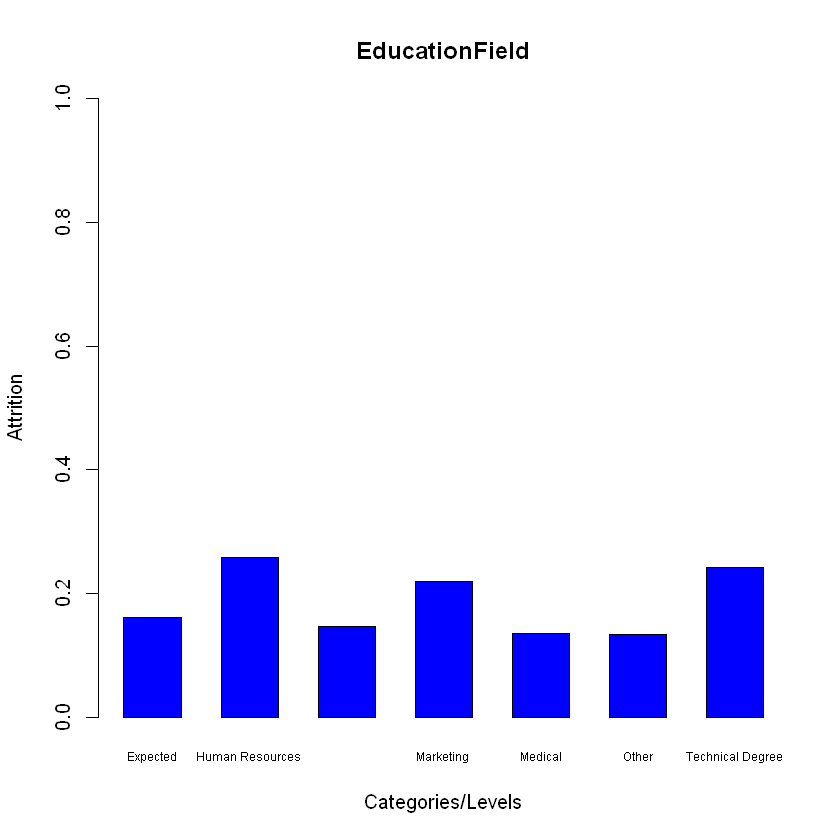

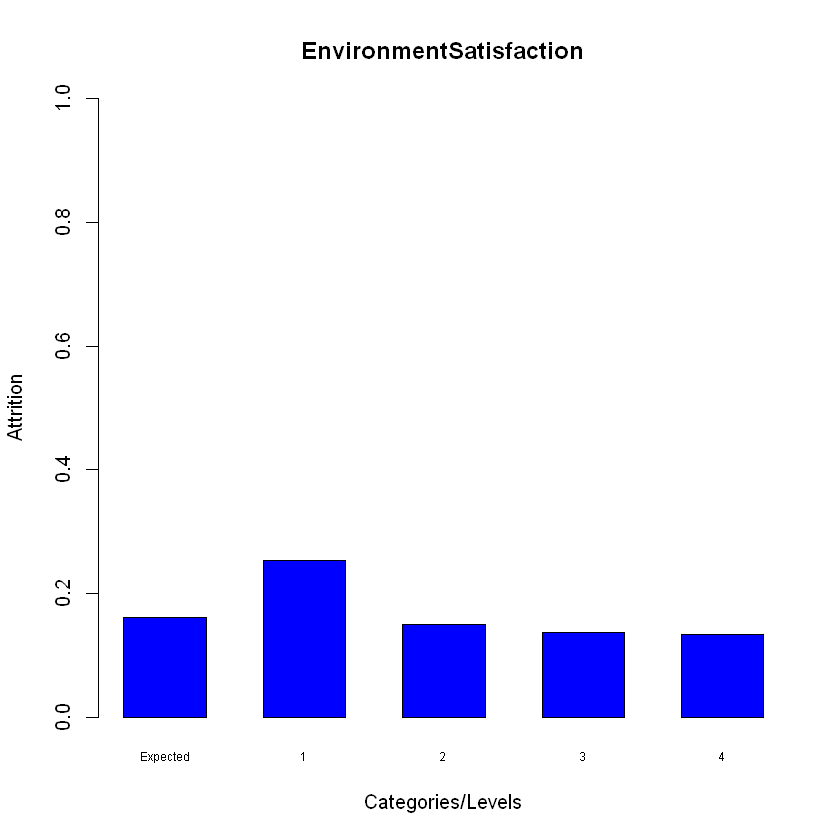

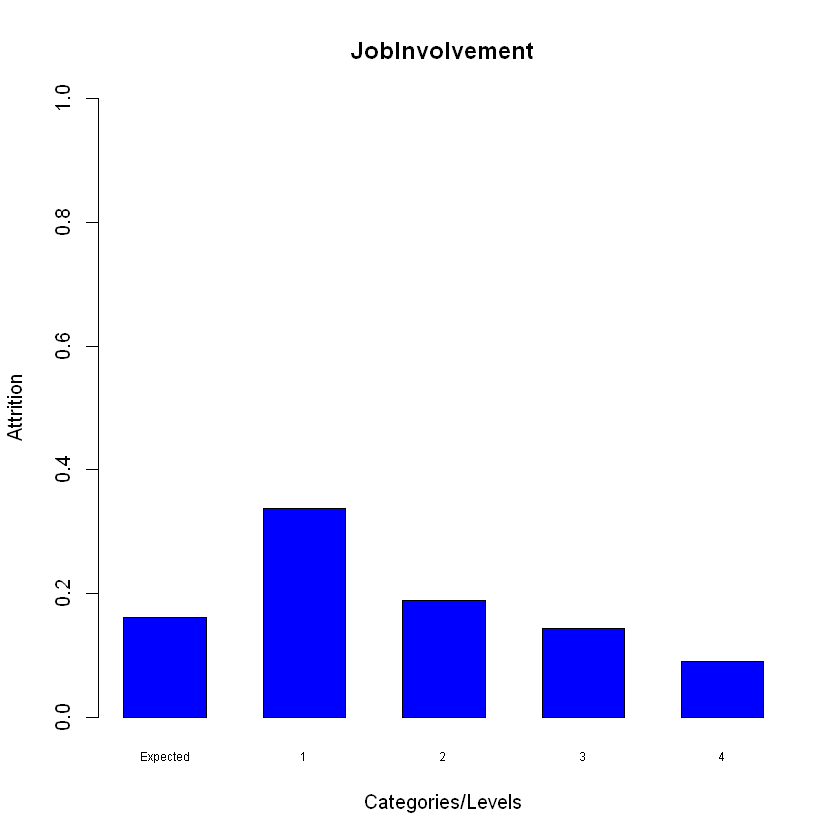

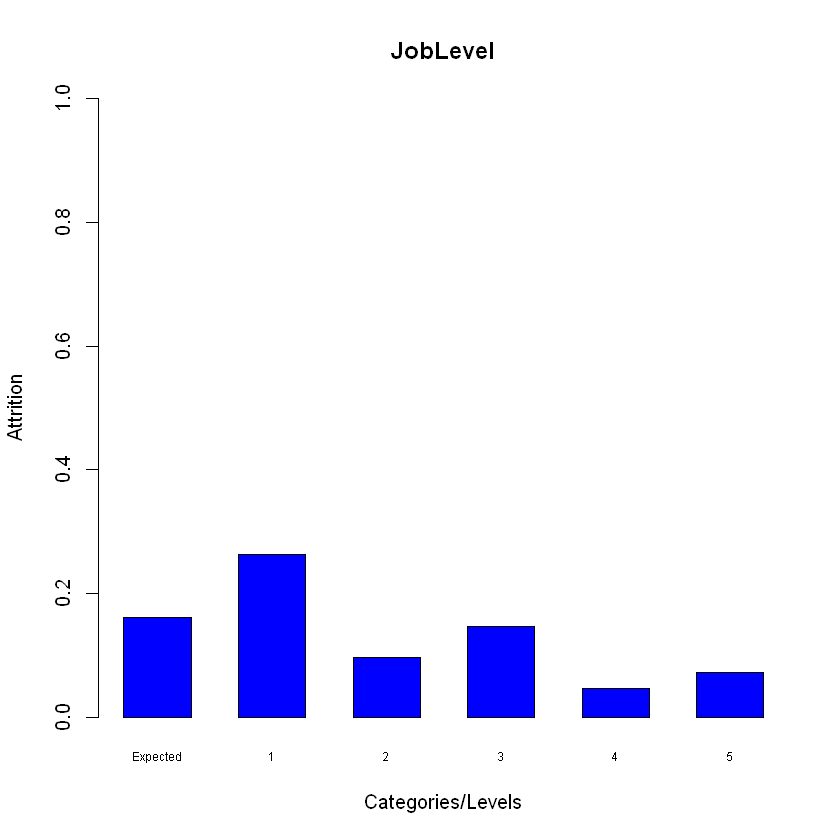

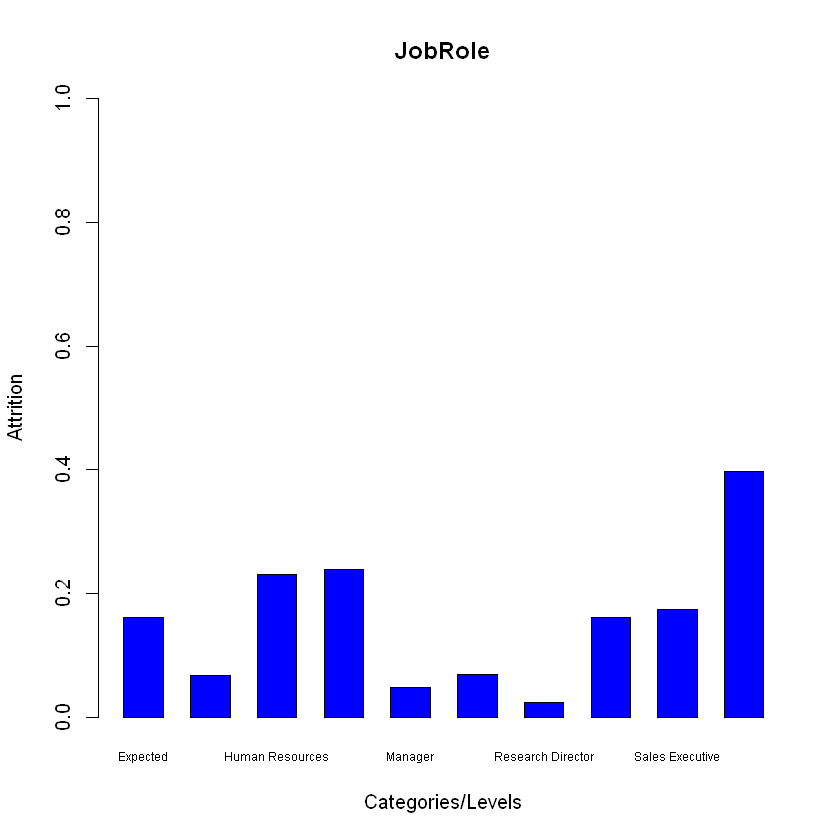

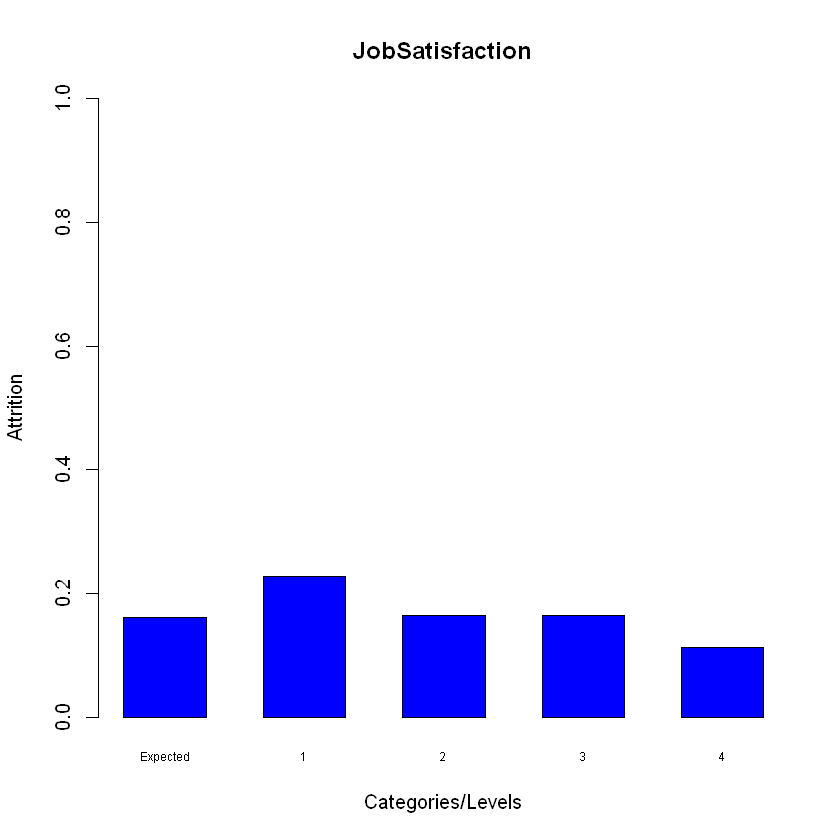

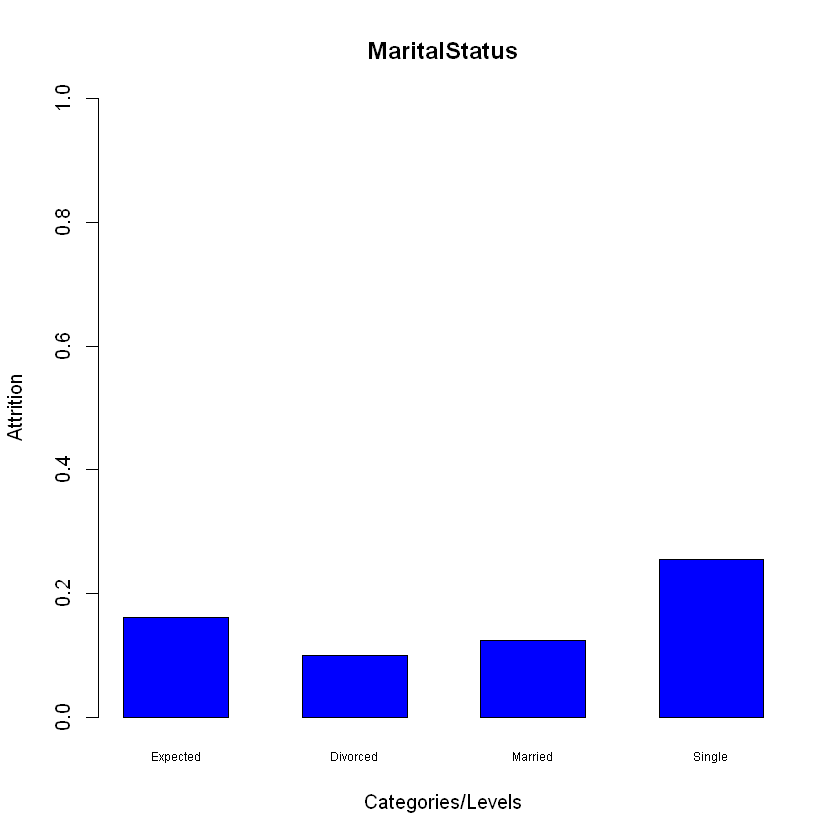

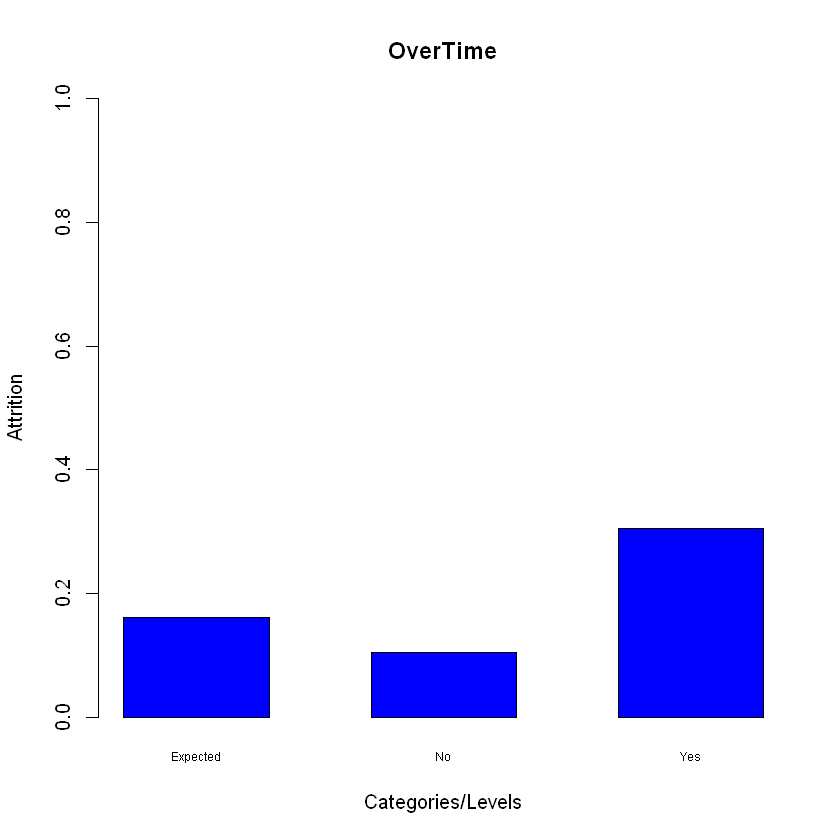

ERROR: Error in `[.data.frame`(hrdata, , k): undefined columns selected


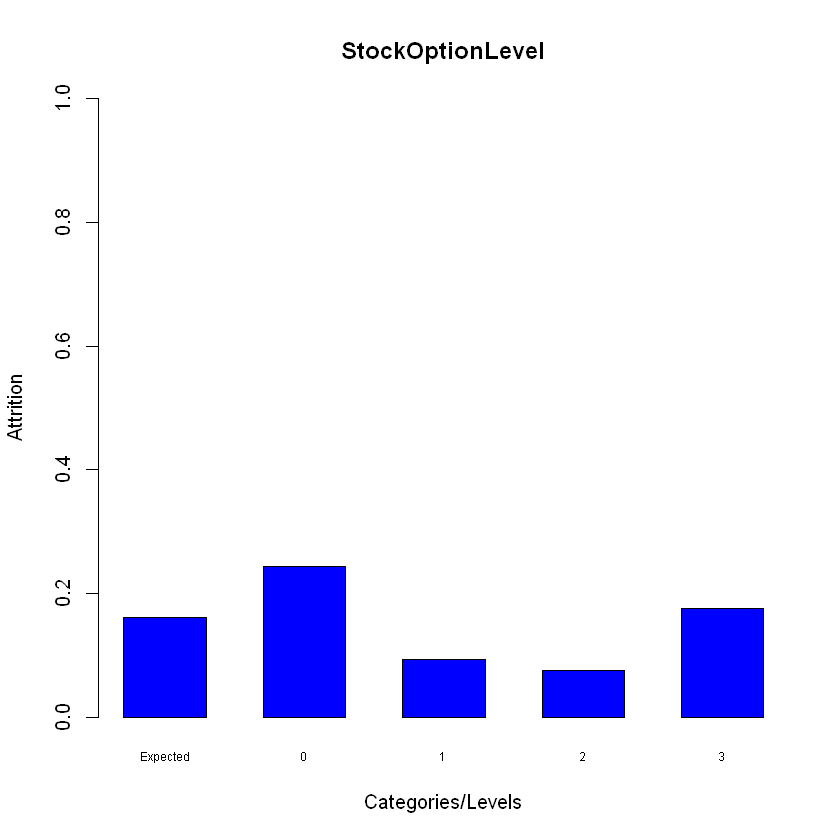

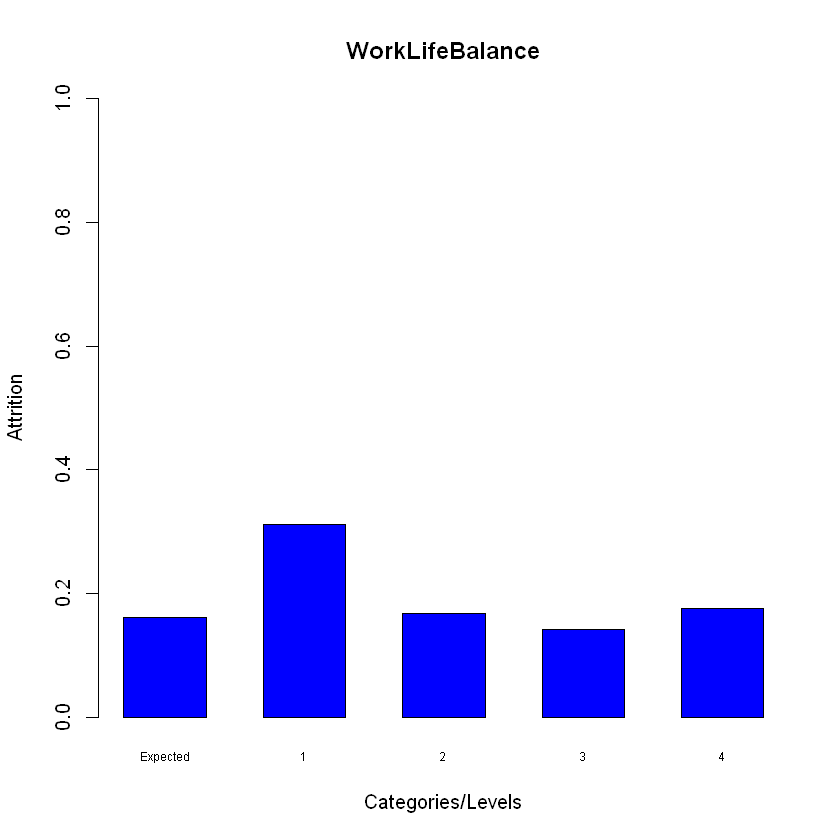

In [76]:
# Comparision of expected attrition and actual attrition in each categories:
#(Note: Expected attrition for each level of a categorical variable is equal to the actual number of observations having attrition)

pooled_prop=nrow(hrdata[hrdata$Attrition==1,])/nrow(hrdata)


for(k in 1:32)
{
if(is.factor(hrdata[,k]))
{props<-c()
prop_vector<-c()
nam<-c()  
  for(i in 1:length(unique(hrdata[,k])))
  {
    props<-nrow(hrdata[hrdata$Attrition==1 & hrdata[,k]==levels(hrdata[,k])[i],])/nrow(hrdata[hrdata[,k]==levels(hrdata[,k])[i],])
prop_vector<- c(prop_vector,props)  
   

se<-sqrt((pooled_prop*(1-pooled_prop))/nrow(hrdata)+(props*(1-props))/nrow(hrdata[hrdata[,k]==levels(hrdata[,k])[i],]))

}
prop_vector1<-c()
prop_vector1<-c(pooled_prop,prop_vector)
#print(names(hrdata[k]))
#print(result)
#if(result=="significant")
#{ 
#print(ifelse(z<z1,sprintf("Significantly Min Attrition in %s is in Category %i",names(hrdata[k]),i),sprintf("Significantly Max Attrition in %s is in Category %i",names(hrdata[k]),i)))
if(k>2)
{x<-barplot(prop_vector1,xlab = "Categories/Levels",ylab="Attrition",names.arg=c("Expected",levels(hrdata[,k])),main = names(hrdata[k]),axisnames=T,ylim = c(0,1),width = 1.5,cex.names = .6,space=0.7,col="blue")}}}


In [ ]:
# Thus employees having the following characteristics have a high probability of attrition:
# 1) No Business Travel (maybe because they are bored at the same place)
# 2) Medical Education field (maybe because they are opening up their own clinic)
# 3) High Job Involvement (maybe because they are saturated now)
# 4) Higher Job Level (maybe because ample of job opportunities are avilable in the market at an executive level with lucrative salaries)
# 5) Doing less overtime (strange, but that could be due to the sampling bias)



In [77]:
# Scaling the numeric attributes:
ints_index=1
for(i in 3:30)
   { if (class(hrdata[,i])== 'integer')
ints_index=c(ints_index,i) }
print(ints_index)
hrdata[,ints_index]=scale(hrdata[,ints_index])
head(hrdata[,ints_index])


 [1]  1  4  6  7  9 11 17 18 19 21 22 24 25 27 28 29 30


Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0.44619856,0.7422739,-1.0105654,-0.8913849,-1.700704,1.3826677,-0.1083127,0.7257730,2.1244130,-1.15016269,-0.426085,-0.4214990,-2.1712429,-0.164557109,-0.06327437,-0.67891464,0.2457504
1.32191535,-1.2973331,-0.1470997,-1.8677901,-1.699043,-0.2405949,-0.2916193,1.4883696,-0.6778187,2.12858163,2.345353,-0.1644554,0.1556541,0.488341541,0.76473737,-0.36858985,0.8062671
0.00834016,1.4138821,-0.8872132,-0.8913849,-1.695721,1.2842882,-0.9373347,-1.6742711,1.3237753,-0.05724792,-0.426085,-0.5500208,0.1556541,-1.143905083,-1.16729002,-0.67891464,-1.1555415
-0.42951824,1.4609690,-0.7638609,1.0614255,-1.694060,-0.4865438,-0.7633739,1.2427877,-0.6778187,-1.15016269,-0.426085,-0.4214990,0.1556541,0.161892216,0.76473737,0.25205973,-1.1555415
-1.08630583,-0.5241163,-0.8872132,-1.8677901,-1.690738,-1.2735802,-0.6446387,0.3257890,2.5247318,-0.87693400,-0.426085,-0.6785426,0.1556541,-0.817455758,-0.61528219,-0.05826506,-0.5950247
-0.53898284,0.5018828,-0.8872132,-0.8913849,-1.689077,0.6448211,-0.7296013,-0.3440822,-1.0781375,-0.60370530,-0.426085,-0.4214990,-0.6199782,-0.001332446,0.76473737,0.25205973,0.5260087


Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0.44619856,1,Travel_Rarely,0.7422739,Sales,-1.0105654,-0.8913849,Life Sciences,-1.700704,2,...,-1.15016269,-0.426085,0,-0.4214990,-2.1712429,1,-0.164557109,-0.06327437,-0.67891464,0.2457504
1.32191535,0,Travel_Frequently,-1.2973331,Research & Development,-0.1470997,-1.8677901,Life Sciences,-1.699043,3,...,2.12858163,2.345353,1,-0.1644554,0.1556541,3,0.488341541,0.76473737,-0.36858985,0.8062671
0.00834016,1,Travel_Rarely,1.4138821,Research & Development,-0.8872132,-0.8913849,Other,-1.695721,4,...,-0.05724792,-0.426085,0,-0.5500208,0.1556541,3,-1.143905083,-1.16729002,-0.67891464,-1.1555415
-0.42951824,0,Travel_Frequently,1.4609690,Research & Development,-0.7638609,1.0614255,Life Sciences,-1.694060,4,...,-1.15016269,-0.426085,0,-0.4214990,0.1556541,3,0.161892216,0.76473737,0.25205973,-1.1555415
-1.08630583,0,Travel_Rarely,-0.5241163,Research & Development,-0.8872132,-1.8677901,Medical,-1.690738,1,...,-0.87693400,-0.426085,1,-0.6785426,0.1556541,3,-0.817455758,-0.61528219,-0.05826506,-0.5950247
-0.53898284,0,Travel_Frequently,0.5018828,Research & Development,-0.8872132,-0.8913849,Life Sciences,-1.689077,4,...,-0.60370530,-0.426085,0,-0.4214990,-0.6199782,2,-0.001332446,0.76473737,0.25205973,0.5260087


ERROR: Error in Summary.factor(structure(c(2L, 1L, 2L, 1L, 1L, 1L, 1L, 1L, 1L, : 'sum' not meaningful for factors


In [78]:
# All set for model building
# Lets split the data into training and testing set
hrdata$Attrition<-as.factor(hrdata$Attrition)
set.seed(123)
split<-sample.split(hrdata,SplitRatio = 0.8)
train<-subset(hrdata,split==TRUE)
test<-subset(hrdata,split==FALSE)

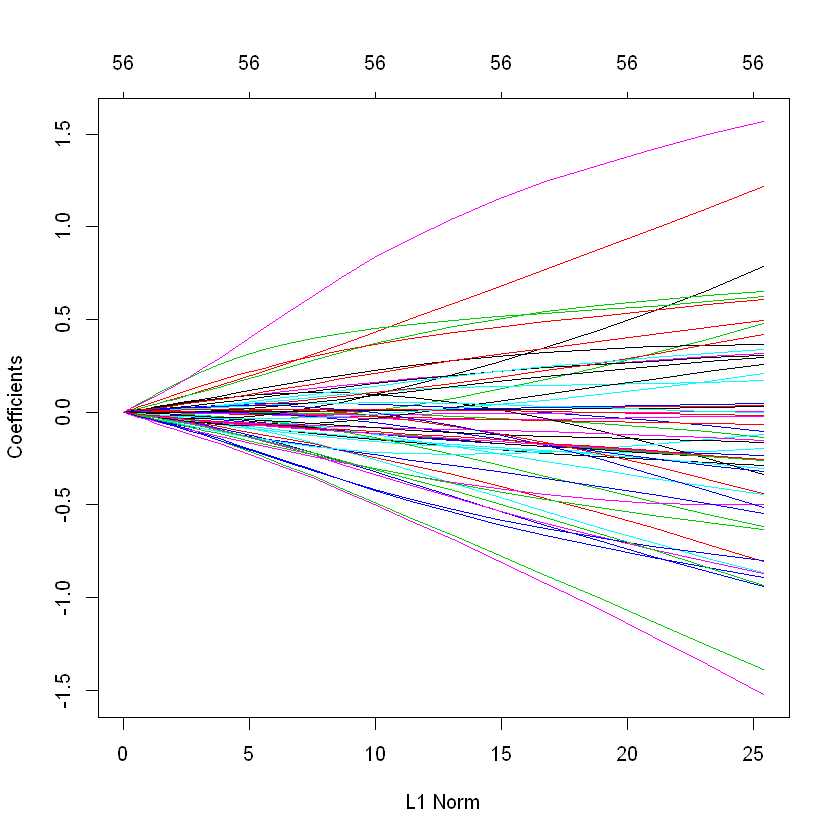

[1] "lambda_min"
[1] 0.009242303
[1] "lambda_1se"
[1] 0.0594102
[1] -2.823289


57 x 1 sparse Matrix of class "dgCMatrix"
                                            1
(Intercept)                      -1.194769007
Age                              -0.176009838
BusinessTravelTravel_Frequently   0.553434619
BusinessTravelTravel_Rarely       0.059647381
DailyRate                        -0.144359651
DepartmentResearch & Development -0.181226338
DepartmentSales                   0.192882400
DistanceFromHome                  0.189245952
Education                         0.014297403
EducationFieldLife Sciences      -0.019089533
EducationFieldMarketing           0.030568146
EducationFieldMedical            -0.168123289
EducationFieldOther              -0.040907790
EducationFieldTechnical Degree    0.266533362
EmployeeNumber                   -0.031142885
EnvironmentSatisfaction2         -0.207250196
EnvironmentSatisfaction3         -0.426513647
EnvironmentSatisfaction4         -0.356650345
HourlyRate                       -0.009709584
JobInvolvement2                   0.06

               1
5    0.206162138
8    0.144873904
11   0.074022320
16   0.051120117
20   0.234462159
24   0.128762928
35   0.192876251
38   0.138675944
41   0.076511845
46   0.039444431
50   0.078489452
54   0.180416739
65   0.065871021
68   0.047045533
71   0.270869735
76   0.035968610
80   0.155069555
84   0.084910132
95   0.102718672
98   0.116750520
101  0.346008491
106  0.028902243
110  0.219559378
114  0.131426245
125  0.404642784
128  0.787211413
131  0.169871404
136  0.052123986
140  0.134359400
144  0.231092403
155  0.205953081
158  0.208684126
161  0.035789440
166  0.038039557
170  0.141006591
174  0.038116071
185  0.012953848
188  0.013438970
191  0.011322352
196  0.183264858
200  0.042741690
204  0.186564897
215  0.312062553
218  0.155142883
221  0.110928754
226  0.039592807
230  0.349956363
234  0.022636157
245  0.011499216
248  0.043706232
251  0.098429603
256  0.033716757
260  0.521402055
264  0.130752366
275  0.184190748
278  0.181280854
281  0.030930237
286  0.0363273

             y_test
ridge_predict   0   1
            0 240  44
            1   0  10

[1] 0.8503401

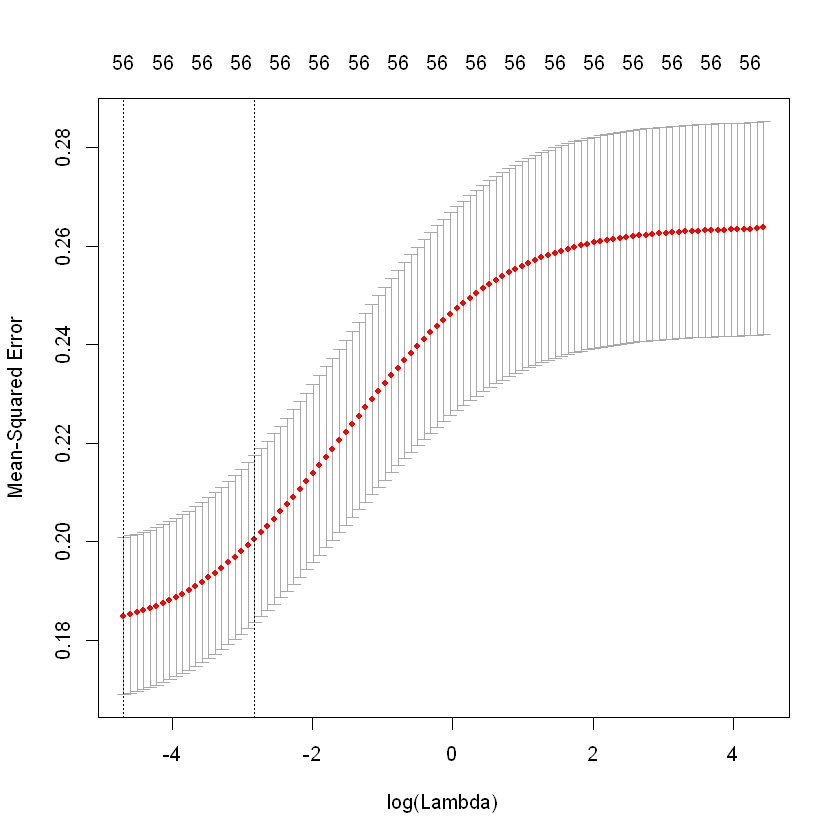

In [84]:
# 1) Using Ridge Regression Classification to shrink non-significant variables:


x_train=model.matrix(Attrition~.,train)[,-1]
y_train=train$Attrition
x_test=model.matrix(Attrition~.,test)[,-1]
y_test=test$Attrition


#set.seed(1)
#train= sample(1:nrow(x),nrow(x)/2)
#test=(-train)
#y.test=y[test]
grid=10^seq(10,-2,length=100)
library(glmnet)
ridge.mod <- glmnet(x_train,y_train,alpha=0,family="binomial" ,lambda=grid)
plot(ridge.mod)
cv.out <- cv.glmnet(x_train,y_train,alpha=0,family="binomial",type.measure = "mse")
#plot result
plot(cv.out)

#min value of lambda
lambda_min <- cv.out$lambda.min
print("lambda_min")
print(lambda_min)
#best value of lambda
lambda_1se <- cv.out$lambda.1se
print("lambda_1se")
print(lambda_1se)
print(log(lambda_1se))
#regression coefficients
coef(cv.out,s=lambda_1se)

#predict class, type=”class”
ridge_prob <- predict(cv.out,newx = x_test,s=lambda_1se,type="response")
#translate probabilities to predictions
ridge_predict <- rep(0,nrow(x_test))
ridge_predict[ridge_prob>.5] <- 1

#confusion matrix
table(ridge_predict,y_test)
mean(ridge_predict==y_test)

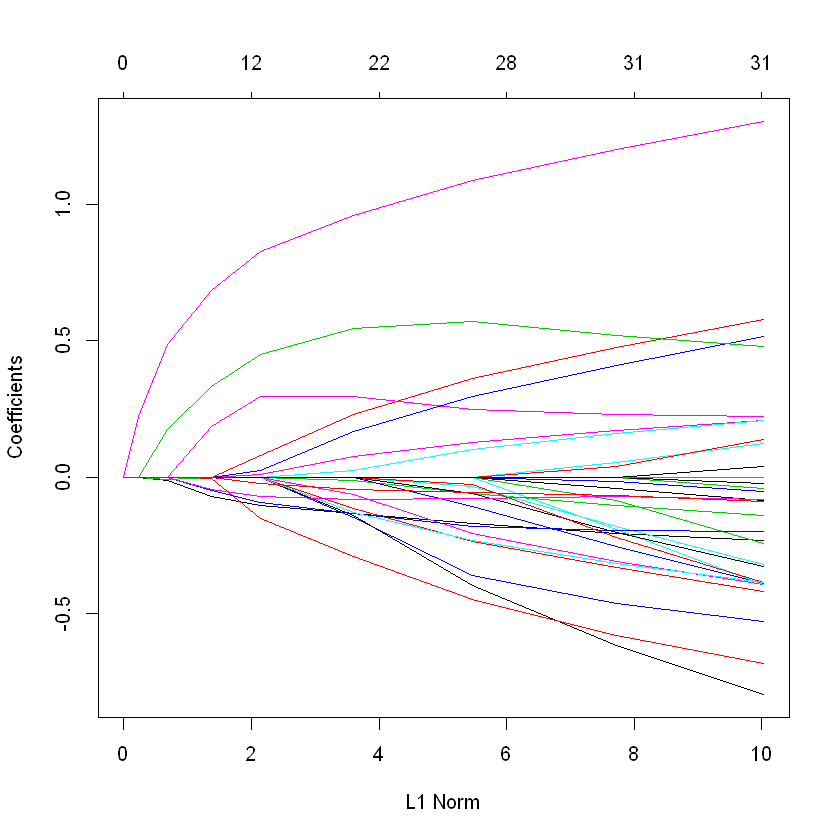

[1] 0.001404748
[1] 0.007496717


57 x 1 sparse Matrix of class "dgCMatrix"
                                           1
(Intercept)                      -0.84362280
Age                              -0.25710006
BusinessTravelTravel_Frequently   0.66806859
BusinessTravelTravel_Rarely       .         
DailyRate                        -0.17040387
DepartmentResearch & Development -0.56675946
DepartmentSales                   0.18402066
DistanceFromHome                  0.23755307
Education                         .         
EducationFieldLife Sciences       .         
EducationFieldMarketing           .         
EducationFieldMedical            -0.11693325
EducationFieldOther               .         
EducationFieldTechnical Degree    0.22270982
EmployeeNumber                    .         
EnvironmentSatisfaction2         -0.22975035
EnvironmentSatisfaction3         -0.58492533
EnvironmentSatisfaction4         -0.51813500
HourlyRate                        .         
JobInvolvement2                   .         
JobInvolvemen

             y_test
lasso_predict   0   1
            0 239  43
            1   1  11

[1] 0.8503401

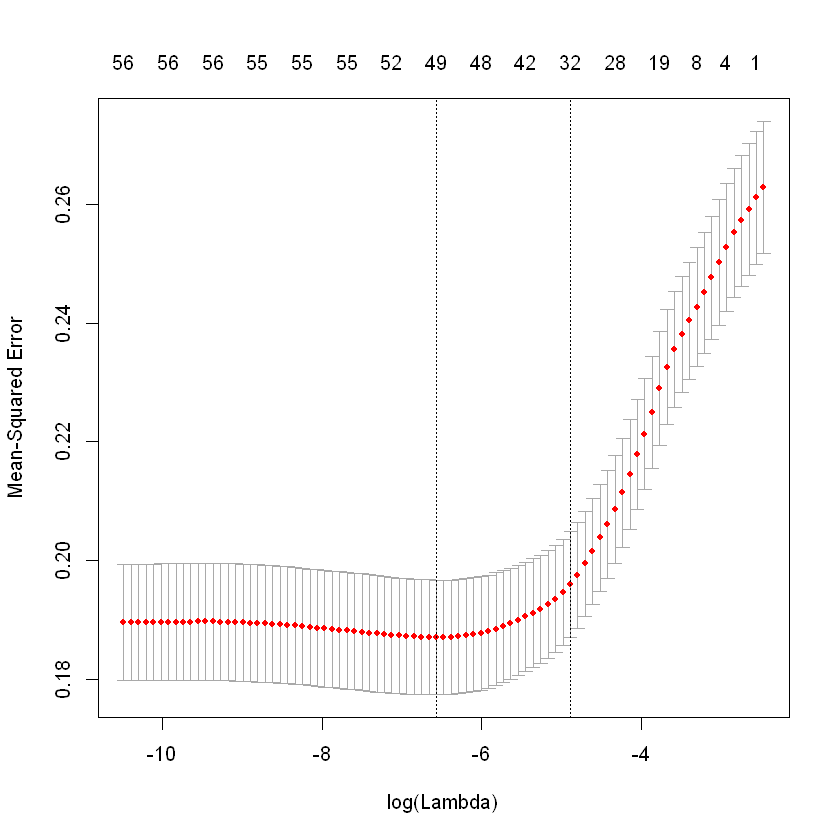

In [83]:
# 2) Using Lasso Regression Classification to shrink non-significant variables to zero:
x_train=model.matrix(Attrition~.,train)[,-1]
y_train=train$Attrition
x_test=model.matrix(Attrition~.,test)[,-1]
y_test=test$Attrition
grid=10^seq(10,-2,length=100)
library(glmnet)
lasso.mod <- glmnet(x_train,y_train,alpha=1,family="binomial" ,lambda=grid)
plot(lasso.mod)

cv.out <- cv.glmnet(x_train,y_train,alpha=1,family="binomial",type.measure = "mse" )
#plot result
plot(cv.out)
#min value of lambda
lambda_min <- cv.out$lambda.min
print(lambda_min)
#best value of lambda
lambda_1se <- cv.out$lambda.1se
print(lambda_1se)
#regression coefficients
coef(cv.out,s=lambda_1se)

#predict class, type=”class”
lasso_prob <- predict(cv.out,newx = x_test,s=lambda_1se,type="response")
#translate probabilities to predictions
lasso_predict <- rep(0,nrow(x_test))
lasso_predict[lasso_prob>.5] <- 1
#confusion matrix
table(lasso_predict,y_test)
mean(lasso_predict==y_test)


In [ ]:
# 3) Building a logistic regression model by random split:
logistic<- glm(Attrition~.,data=train,family=binomial)
prob_pred<-predict(logistic,newdata=test,type='response')
l_pred<-ifelse(prob_pred>0.5,1,0)
cm<- table(test$Attrition,l_pred)
cm
accuracy<-sum(diag(cm))/sum(cm)
accuracy

In [ ]:
# 3) Building a logistic Regression by cross validation to get a more realistic accuracy:
library(caret)
logistic = train(Attrition ~ ., data=train, method="glm",
                trControl = trainControl(method = "cv"))


pred <- predict(logistic,newdata = test)

table(pred,y_test)
mean(pred == y_test)

In [ ]:
# 4) Building a linear discriminant model by random split:
library(MASS)
ldafit<- lda(Attrition~.,data=train)

prob_pred<-predict(ldafit,newdata=test)
cm<- table(test$Attrition,prob_pred$class)
cm
accuracy<-sum(diag(cm))/sum(cm)
accuracy

In [ ]:
# 4) Building a linear discriminant by cross validation to get a more realistic accuracy:
lda.fit = train(Attrition ~ ., data=train, method="lda",
                trControl = trainControl(method = "cv"))


pred <- predict(lda.fit,newdata = test)

table(pred,y_test)
mean(pred == y_test)

In [ ]:
# 5) Decision tree classification
library(rattle)
library(rpart.plot)
library(RColorBrewer)
decision_tree<- rpart(train$Attrition~.,data=train,method='class')
fancyRpartPlot(decision_tree)
decision<-predict(decision_tree,newdata=testing,type='class')
cm<-table(testing$Attrition,decision)
cm
accuracy<- sum(diag(cm))/sum(cm)
accuracy

In [ ]:
# 6) Random forest classification:
library(randomForest)
RF<- randomForest(Attrition ~ .,data=train, importance=T,ntree=2000)
ensemble<- predict(RF,newdata=testing)
cm<-table(testing$Attrition,ensemble)
cm
accuracy<- sum(diag(cm))/sum(cm)
accuracy
print(importance(RF,type = 2))
varImpPlot(RF)

In [ ]:
# 7) Support Vector Machine Classification:
library(e1071)
model_svm<- svm(Attrition~.,train)
supportvm<-predict(model_svm,testing)
cm<- table(testing$Attrition,supportvm)
cm
accuracy<- sum(diag(cm))/sum(cm)
accuracy

In [ ]:
# 8) Naive Bayes Classification:
model_nb<- naiveBayes(Attrition~.,train)
naiveb<-predict(model_nb,testing)
cm<- table(testing$Attrition,naiveb)
cm
accuracy<- sum(diag(cm))/sum(cm)
accuracy